<a href="https://colab.research.google.com/github/amudhan023/DeepLearning/blob/main/pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn


import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.9.0+cu126
0.24.0+cu126


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [3]:
# Getting a dataset
# Setup training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)


100%|██████████| 26.4M/26.4M [00:01<00:00, 14.3MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 211kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.94MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 13.4MB/s]


In [4]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [5]:
len(train_data),len(test_data)

(60000, 10000)

In [6]:
image, label = train_data[0]
image.shape

torch.Size([1, 28, 28])

In [7]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
image.shape, class_names[label]

(torch.Size([1, 28, 28]), 'Ankle boot')

In [10]:
train_data.data[0].shape, train_data.data[0].dtype

(torch.Size([28, 28]), torch.uint8)

In [11]:
train_data.targets.shape

torch.Size([60000])

In [12]:
class_names[label]

'Ankle boot'

Image shape: torch.Size([1, 28, 28])


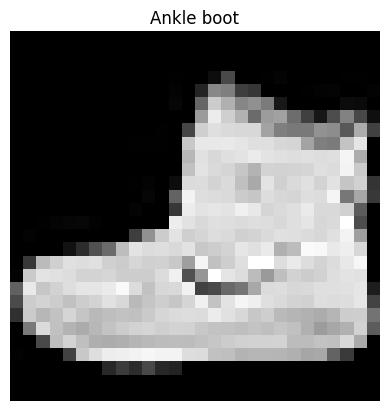

In [13]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False);

In [14]:
def plot_image(image, label):
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

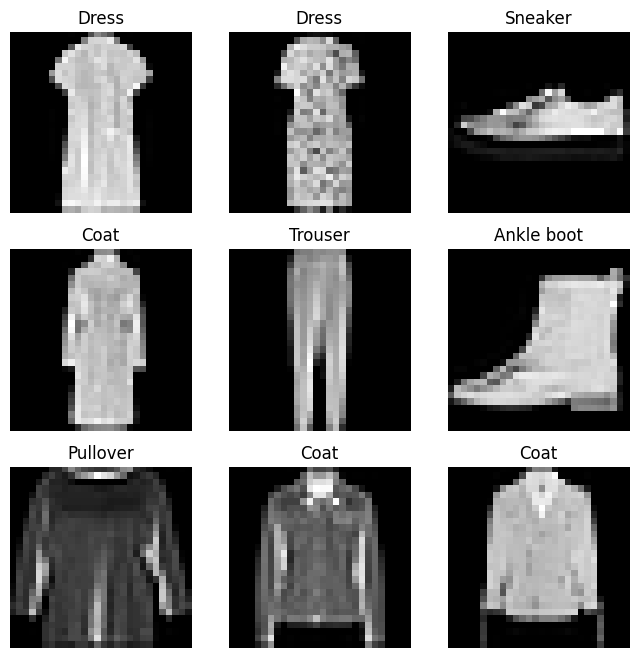

In [15]:
# Plot more images
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(class_names[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [16]:
# hyperparameters
BATCH_SIZE = 32
train_data_loader = DataLoader(train_data,
                               batch_size=BATCH_SIZE,
                               shuffle=True)
test_data_loader = DataLoader(test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

len(train_data_loader), len(test_data_loader)


(1875, 313)

In [17]:
train_feature_batch, train_label_batch = next(iter(train_data_loader))
train_feature_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [18]:
# create a flatter layer
flatten_model = nn.Flatten()

# Get a single image
x = train_feature_batch[1]
print(f"Image shape before flattening: {x.shape}")
# Flatten the image
output = flatten_model(x)
print(f"Image shape after flattening: {output.shape}")

output



Image shape before flattening: torch.Size([1, 28, 28])
Image shape after flattening: torch.Size([1, 784])


tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.4353, 0.8039, 0.3608, 0.1020, 0.0510, 0.0000, 0.0784, 0.4588, 0.7333,
         0.2510, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.8627, 0.9216, 0.8941, 0.7529, 0.6235, 0.5490, 0.4980, 0.6824, 0.8275,
         0.9176, 0.9294, 0.6745, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.1255, 0.9608, 0.8667, 0.7922, 0.9490, 0.4392, 0.2510, 0.3333, 0.4980,
         0.8784, 0.8235, 0.9098, 0.9294, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.2588, 0.9765, 0.8784, 0.8588, 0.7725, 1.0000, 0.8157, 0.8745,
         0.9216, 0.8275, 0.8941, 0.9098, 0.9686, 0.2196, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [19]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_shape, out_features = hidden_units),
            nn.Linear(in_features = hidden_units, out_features = output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

In [20]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [22]:
# create accuracy function
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


In [23]:
# train loop 
def train_step(model, data_loader):
    model.train()
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        X = X.to(device)
        y = y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        y_pred_class = torch.softmax(y_pred, dim=1).argmax(dim=1)
        train_acc += accuracy_fn(y, y_pred_class)
    return train_loss/len(data_loader), train_acc/len(data_loader)

def test_step(model, data_loader):
    model.eval()
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for batch, (X, y) in enumerate(data_loader):
            X = X.to(device)
            y = y.to(device)
            y_pred  = model(X)
            loss = loss_fn(y_pred, y)
            test_loss += loss.item()
            y_pred_class = torch.softmax(y_pred, dim=1).argmax(dim=1)
            test_acc += accuracy_fn(y, y_pred_class)
    return test_loss/len(data_loader), test_acc/len(data_loader)


In [24]:
# Putting it all together
# add timer for each epoch
from tqdm.auto import tqdm
import time
torch.manual_seed(42)
epochs = 15
train_losses = []
test_losses = []
epoch_count = []
train_acc = []
test_acc = []
for epoch in tqdm(range(epochs)):
    start_time = time.time()
    train_loss, train_acc_epoch = train_step(model_0, train_data_loader)
    test_loss, test_acc_epoch = test_step(model_0, test_data_loader)
    end_time = time.time()
    epoch_duration = end_time - start_time
    print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f}, Train Acc: {train_acc_epoch:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc_epoch:.2f}% | Duration: {epoch_duration:.2f} seconds")
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    epoch_count.append(epoch)
    train_acc.append(train_acc_epoch)
    test_acc.append(test_acc_epoch)

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 0.5904, Train Acc: 79.17% | Test Loss: 0.5095, Test Acc: 82.04% | Duration: 10.54 seconds
Epoch: 1 | Train Loss: 0.4763, Train Acc: 83.32% | Test Loss: 0.4799, Test Acc: 83.20% | Duration: 10.11 seconds
Epoch: 2 | Train Loss: 0.4550, Train Acc: 84.05% | Test Loss: 0.4766, Test Acc: 83.43% | Duration: 9.96 seconds
Epoch: 3 | Train Loss: 0.4425, Train Acc: 84.47% | Test Loss: 0.4631, Test Acc: 83.75% | Duration: 10.05 seconds
Epoch: 4 | Train Loss: 0.4358, Train Acc: 84.70% | Test Loss: 0.4687, Test Acc: 83.27% | Duration: 10.14 seconds
Epoch: 5 | Train Loss: 0.4291, Train Acc: 84.97% | Test Loss: 0.4589, Test Acc: 83.64% | Duration: 9.50 seconds
Epoch: 6 | Train Loss: 0.4248, Train Acc: 85.22% | Test Loss: 0.4877, Test Acc: 83.32% | Duration: 9.94 seconds
Epoch: 7 | Train Loss: 0.4227, Train Acc: 85.06% | Test Loss: 0.4722, Test Acc: 83.38% | Duration: 9.99 seconds
Epoch: 8 | Train Loss: 0.4203, Train Acc: 85.25% | Test Loss: 0.4713, Test Acc: 83.46% | Duration: 1

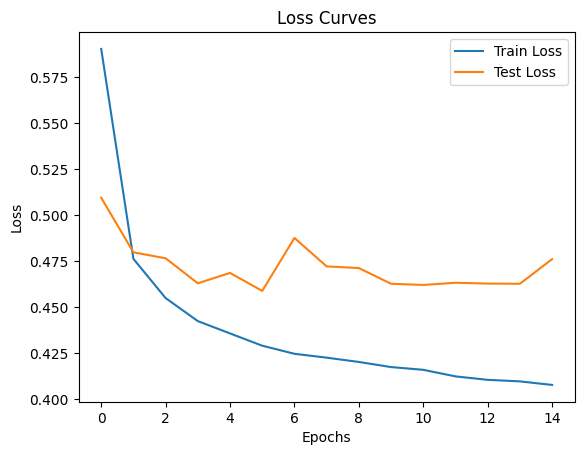

In [25]:
# Plot the loss curves
plt.plot(epoch_count, train_losses, label="Train Loss")
plt.plot(epoch_count, test_losses, label="Test Loss")
plt.title("Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

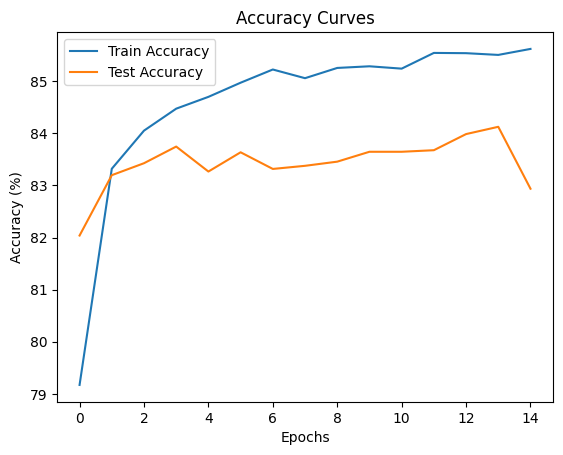

Done!


In [26]:
# Plot the accuracy curves
plt.plot(epoch_count, train_acc, label="Train Accuracy")
plt.plot(epoch_count, test_acc, label="Test Accuracy")
plt.title("Accuracy Curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()
print("Done!")